In [1]:
%matplotlib inline

from IPython.display import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [3]:
#data libraries
import pandas as pd
import numpy as np

#keras libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

#plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#mathematical libraries
from scipy.stats import pearsonr

#notebook options
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

Using TensorFlow backend.


# Pima Indians Diabetes dataset analysis using Deep Learning.

## Purpose of the analysis: 

Inspired by [__Jason Brownlee__](https://machinelearningmastery.com/) blog and books I've decided to start developing my __Deep Learning__ knowldege. 

This is the first time I've code in Keras so after classical exploratory analysis I will evaluate __Keras Model__ and try to tune it a little bit to get a better result. 

## Table of contents:
1. Exploratory analysis
2. RAE vs Player count
3. RAE vs Player rating
4. Summary


## 1. Exploratory analysis

In [4]:
df = pd.read_csv(r"..\data\pima-indians-diabetes.data.txt", sep=",", header=None)
df.columns = ["Number of times pregnant", 
              "Plasma glucose concentration a 2h in an oral glucose tolerance test",
              "Diastolic blood pressure (mm Hg)",
              "Triceps skin fold thickness (mm)",
              "2-H serum insulin (mu U/ml)",
              "Body mass index (weight in kg/(height in m)^2)",
              "Diabetes pedigree function",
              "Age (years)",
              "Class variable (0 or 1)"]

df.sample(3)

,Number of times pregnant,Plasma glucose concentration a 2h in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-H serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
252,2,90,80,14,55,24.4,0.249,24,0
764,2,122,70,27,0,36.8,0.340,27,0
161,7,102,74,40,105,37.2,0.204,45,0


In [5]:
print(F"Number of instances: {df.shape[0]}, number of attributes: {df.shape[1]}.")

Number of instances: 768, number of attributes: 9.


So first we see that our dataset in not so big, as Deep Learning works best on Big Data topics, right? We have a binary classification column "__Class variable (0 or 1)__" (class value 1 is interpreted as "tested positive for diabetes") so ...still good start for our project.

Next lets search for variable types, missing values and statistics.

In [6]:
df.dtypes

Number of times pregnant                                                 int64
Plasma glucose concentration a 2h in an oral glucose tolerance test      int64
Diastolic blood pressure (mm Hg)                                         int64
Triceps skin fold thickness (mm)                                         int64
2-H serum insulin (mu U/ml)                                              int64
Body mass index (weight in kg/(height in m)^2)                         float64
Diabetes pedigree function                                             float64
Age (years)                                                              int64
Class variable (0 or 1)                                                  int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number of times pregnant                                               768 non-null int64
Plasma glucose concentration a 2h in an oral glucose tolerance test    768 non-null int64
Diastolic blood pressure (mm Hg)                                       768 non-null int64
Triceps skin fold thickness (mm)                                       768 non-null int64
2-H serum insulin (mu U/ml)                                            768 non-null int64
Body mass index (weight in kg/(height in m)^2)                         768 non-null float64
Diabetes pedigree function                                             768 non-null float64
Age (years)                                                            768 non-null int64
Class variable (0 or 1)                                                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All variables are numericalm and no missing values, but ...

In [8]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2h in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-H serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Variables have different scale of values and each have a minimum value of __0__ so this is our missing __Null__ for most of the variables.

Pearson's standard correlation coefficient:


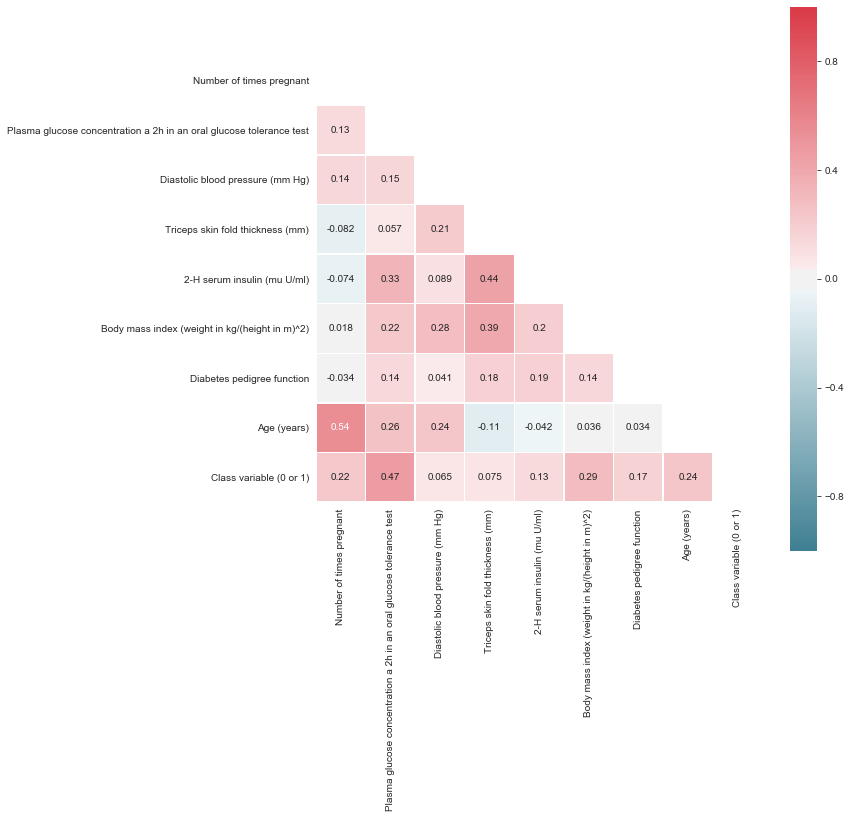

In [9]:
print(f"Pearson's standard correlation coefficient:")
cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = df.corr()
plt.figure(figsize=(10, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, 
                     mask=mask, 
                     vmin=-1, 
                     vmax=1, 
                     square=True, 
                     linewidths=.5, 
                     annot=True,
                     cmap=cmap,
                    )

We don't see by human eye huge correlation between input variables and the output column, only one has 0,47 correaltion coofficenct.

Hope our Deep Learning model will see something more.

# 2. Define Keras Model

Now we will focus on creating a __Sequential model__ - a model that is a linear stack of layers.

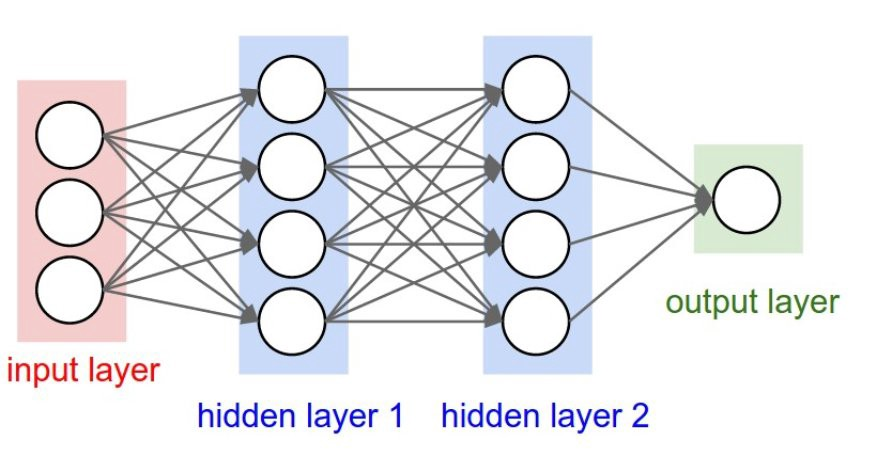

In [10]:
Image(filename=r"..\data\img\sequential.jpeg", width = 450)

In [12]:
# Split to input matrix and output label
X = df.iloc[:,0:8]
y = df.iloc[:,8]

# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model
model.fit(X, y,
          epochs=150,
          batch_size=10,
          verbose=0,
          )

# Evaluate model on the same data
_, accuracy  = model.evaluate(X, y)
print(f"Accuracy: {accuracy}.")

768/768 [==============================] - 0s 95us/step
Accuracy: 0.7044270833333334.


In [13]:
model_accuracy = []

for i in range(5):
    # Fit model
    model.fit(X, y,
              epochs=150,
              batch_size=10,
              verbose=0,
              )

    # Evaluate model on the same data
    _, accuracy  = model.evaluate(X, y)
    model_accuracy.append(accuracy)
    
print(f"Accuracy: {model_accuracy}.")

768/768 [==============================] - 0s 29us/step
Accuracy: [0.73046875, 0.7434895833333334, 0.7799479166666666, 0.8059895833333334, 0.8072916666666666].


So original model created by __Jason Brownlee__ has given a __~73 - 81%__ score, but we have to remember that Neural networks are a stochastic algorithm, so can train a different model with different skill each time the code is run.

# 3. Model tuning

Tuning Deep Learning model is not such an easy tasks, as there is no clear answer on adding / removing layers and nodes for better performance.

For the purpose of my first __DL__ project we will experiment and see what happens.

First lets __add some layers__.

In [14]:
# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model
model.fit(X, y,
          epochs=150,
          batch_size=10,
          verbose=0,
          )

# Evaluate model on the same data
_, accuracy  = model.evaluate(X, y)
print(f"Accuracy: {accuracy}.")

768/768 [==============================] - 0s 122us/step
Accuracy: 0.76953125.


Or even more:

In [15]:
# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(6, activation="relu"))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model
model.fit(X, y,
          epochs=150,
          batch_size=10,
          verbose=0,
          )

# Evaluate model on the same data
_, accuracy  = model.evaluate(X, y)
print(f"Accuracy: {accuracy}.")

768/768 [==============================] - 0s 201us/step
Accuracy: 0.76171875.


Not a much upgrade in our model ... Let's try to add __epochs__:

In [16]:
# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model

for i in [150, 200, 250, 500]:
    model.fit(X, y,
              epochs=i,
              batch_size=10,
              verbose=0,
              )

    # Evaluate model on the same data
    _, accuracy  = model.evaluate(X, y)
    print(f"Model with {i} epochs accuracy: {accuracy}.")

768/768 [==============================] - 0s 167us/step
Model with 150 epochs accuracy: 0.7734375.
768/768 [==============================] - 0s 26us/step
Model with 200 epochs accuracy: 0.796875.
768/768 [==============================] - 0s 14us/step
Model with 250 epochs accuracy: 0.796875.
768/768 [==============================] - 0s 16us/step
Model with 500 epochs accuracy: 0.82421875.


So with more epochs our model seems to get better and better. How about batch size tuning:

In [17]:
# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model

for i in [10, 20, 50, 100]:
    model.fit(X, y,
              epochs=500,
              batch_size=i,
              verbose=0,
              )

    # Evaluate model on the same data
    _, accuracy  = model.evaluate(X, y)
    print(f"Model with {i} batch_size accuracy: {accuracy}.")

768/768 [==============================] - 0s 183us/step
Model with 10 batch_size accuracy: 0.8098958333333334.
768/768 [==============================] - 0s 26us/step
Model with 20 batch_size accuracy: 0.8098958333333334.
768/768 [==============================] - 0s 14us/step
Model with 50 batch_size accuracy: 0.8190104166666666.
768/768 [==============================] - 0s 14us/step
Model with 100 batch_size accuracy: 0.828125.


Even better so ... let's __GO FOR DEPTH__ one last time:

In [19]:
# Split to input matrix and output label
X = df.iloc[:,0:8]
y = df.iloc[:,8]

# Define keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile keras model
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
              )

# Fit model
model.fit(X, y,
          epochs=1000,
          batch_size=250,
          verbose=0,
          )

# Evaluate model on the same data
_, accuracy  = model.evaluate(X, y)
print(f"Accuracy: {accuracy}.")

768/768 [==============================] - 0s 217us/step
Accuracy: 0.7721354166666666.


And we overdone it! :)

Of course we did not split the data into __train/test__ samples and not added __early_stopping__ to our model, but this notebook is just a start to my __Deep Learning__ process.

In summary __DL__ is a great field of knowledge that will grow and help Data Scientist in many problem solving tasks. Combined with __Big Data__ ... sky is the limit!

### @author

__Marcin Rydelski__, e-mail: marcin.rydelski@gmail.com